### Why we need feature selection?
- Curse of dimentionality: If we increase the dimentions, after a threshold  no. of features ,then we will be damaging our model accuracy
- So, we need to remove the irrelavant features
- For that we will do feature selection.
- Redundant- height in meter , cm , and in feet -- this is redunant data


### Dimensionality Reduction Techniques :
- 1) Feature Extraction : what we can do is , we can extract only limited no. of features , or  we can create new features by addition , subtraction , multiplication and division of  different features: We use "PCA" for feature extraction
- 2) Feature Selection : Technique uses the subset of input features ,for example  we will choose ony 5 features from 26 features
  3) There are 3 different types of feature selection method named - Filter method, wrapper and embedded method.
   

### Types of Feature Selection

 #### Filter   Method :
- Check the relevance of feature with output or  target variable
- What we will do , we will select best subset using statistical test -like CHI- Square test , ANOVA , Pearson Co-relation  coefficient Information gain etc,for example : we have 5 feature a,b ,c,d,e : now what we will do is we perform chi square test on each feature, we calculate the relevance like for ex  0.7 for a, 0.1 for b , 0.05 for c , 0.5 for d , 0.01 for e
- We can conclude that variable a and d are significant, So we can use a, d as our features.
     
     
 #### Wrapper  Method ( It has two types) :
     
- 1) ##### Forward selection :
  
     - We compute the accuracy and performance of  fetaure A and get           the accurcay  and than we add a new feature with A  let suppose         B, if it enhances the accuracy we will keep the feature, if not         discard and we will repeat this process for all the   features          in the dataset.

-  2) ##### Backward elemination:
   
      - We will run statistical test like chi square , anova , pearson          coefficient  to find the least important features.For example           we run chi square in the data set , where we get P values.
      -  So, if P - value is <= 0.05, than the feature will be useful            else features are irrelevant.
      -  Generally, we don't perform forward and backward selection   when data is large 

  
  #### Embedded Method:(A, B, C, D, E)
-  Similar, to wrapper method but it learn the feature while building of model. 
-  Pick any feature like B and check the accuracy after using the model.
-  Now we pick AC as a feature  to check accuracy.
-  So, we have all the permutation to make and check which feature combination best suited for our model. for example ADC -->> check the accuracy
-  Used in Decision Tree 

### Coding part : Mobile Price Classification

### Univariate Selection 
- Chi square method
- We choosed univariate method because it will select those features, which has strong relation with the target variable.
  

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# k best features

In [130]:
data = pd.read_csv("feature_learning_train.csv")
data.head(n = 5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [131]:
x = data.iloc[:, 0 : 20]
y = data.iloc[:, -1]

In [132]:
x.shape, y.shape

((2000, 20), (2000,))

In [133]:
x.head(n =3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


### Apply SelectKBest  top 10 features

In [134]:
best_features = SelectKBest(score_func = chi2, k = 10) 
# top 10 features 

In [135]:
best_features

SelectKBest(score_func=<function chi2 at 0x1378360c0>)

In [136]:
type(best_features)

sklearn.feature_selection._univariate_selection.SelectKBest

In [137]:
fit = best_features.fit(x, y)

In [138]:
fit

SelectKBest(score_func=<function chi2 at 0x1378360c0>)

In [139]:
fit.scores_ # returns the relevance of each feature with target 

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [140]:
dfscores = pd.DataFrame(fit.scores_)

In [141]:
dfscores.head(n=3)

,0
0,14129.866576
1,0.723232
2,0.648366


In [142]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [143]:
dfcolumns = pd.DataFrame(x.columns)

In [144]:
dfcolumns.head(n =3)

,0
0,battery_power
1,blue
2,clock_speed


In [145]:
# we can join both 
pd.concat([dfcolumns, dfscores], axis = 1 )
# these are the features of mobile with their relevance 

,0,0
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [146]:
featurescore = pd.concat([dfcolumns, dfscores], axis = 1)

In [147]:
featurescore.columns = ["Feature", "Score"]

In [148]:
featurescore

,Feature,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [149]:
featurescore_sorted=featurescore.sort_values(by = "Score", ascending= False)

In [150]:
featurescore_sorted

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance

In [151]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [152]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [153]:
model.feature_importances_

array([0.07375264, 0.00699597, 0.02740503, 0.00719777, 0.02482975,
       0.00676431, 0.03616798, 0.02402319, 0.03721165, 0.02214808,
       0.02895153, 0.05501419, 0.05940386, 0.48807656, 0.02768168,
       0.0263982 , 0.02880586, 0.00504998, 0.00716905, 0.00695275])

In [154]:
feature_importance=pd.DataFrame(model.feature_importances_, index =x.columns, columns = ["Importance"])

In [155]:
feature_importance

,Importance
battery_power,0.073753
blue,0.006996
clock_speed,0.027405
dual_sim,0.007198
fc,0.024830
four_g,0.006764
int_memory,0.036168
m_dep,0.024023
mobile_wt,0.037212
n_cores,0.022148


In [156]:
feature_importance =feature_importance.sort_values(by = "Importance", ascending = False)

In [157]:
feature_importance.head(n=5)

,Importance
ram,0.488077
battery_power,0.073753
px_width,0.059404
px_height,0.055014
mobile_wt,0.037212


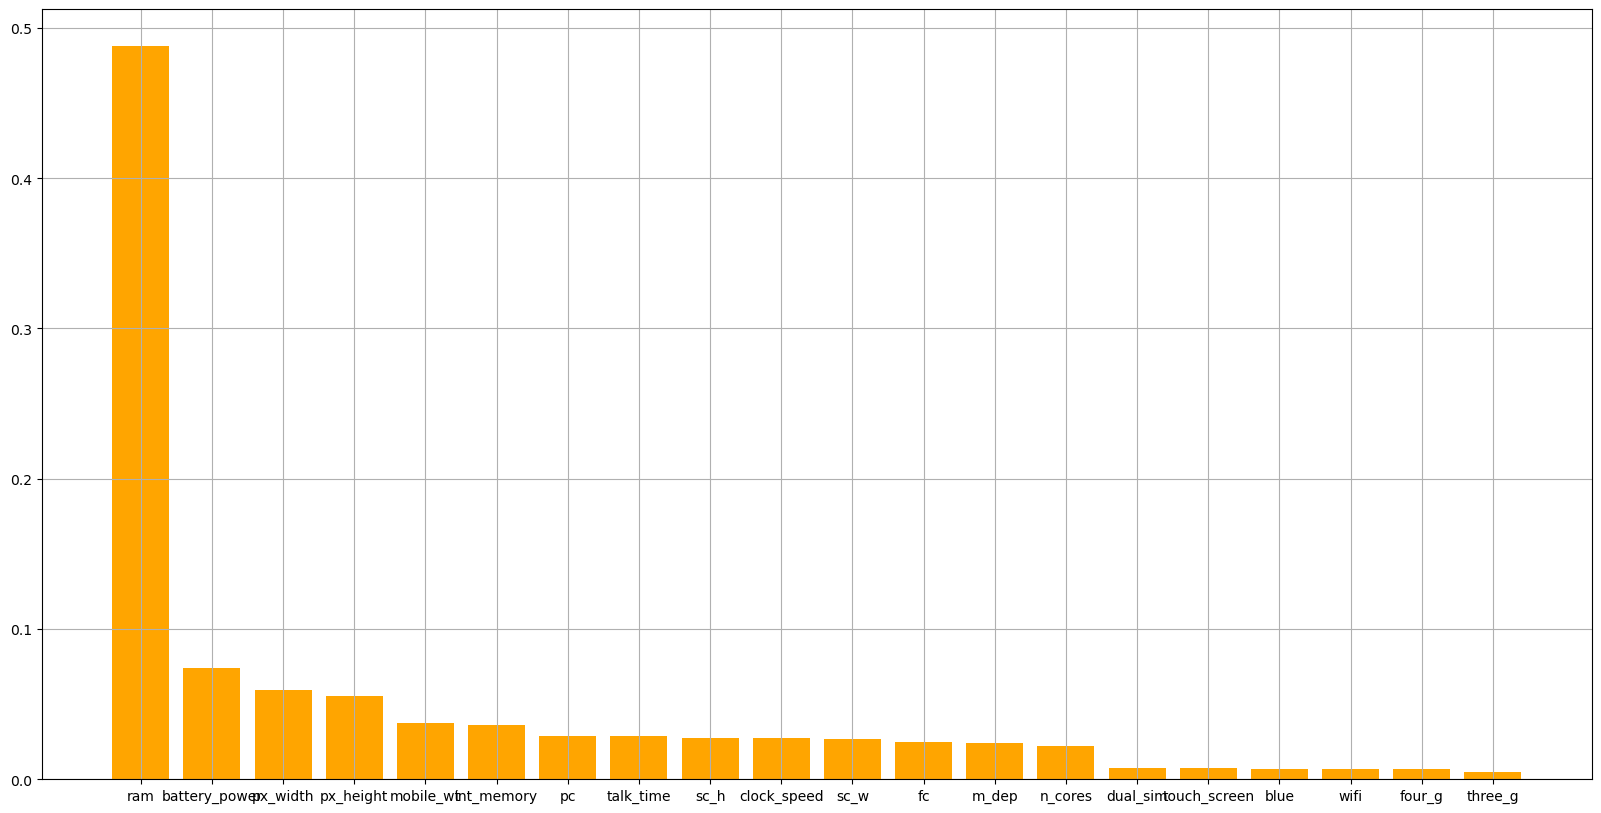

In [158]:
plt.figure(figsize= (20, 10))
plt.bar(feature_importance.index, feature_importance["Importance"], color = "orange")
plt.grid()
plt.show()

### Co- Relation Method 


In [159]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [160]:
data_corr = data.corr() #Correlation matrix

In [161]:
data_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [162]:
import seaborn as sns 

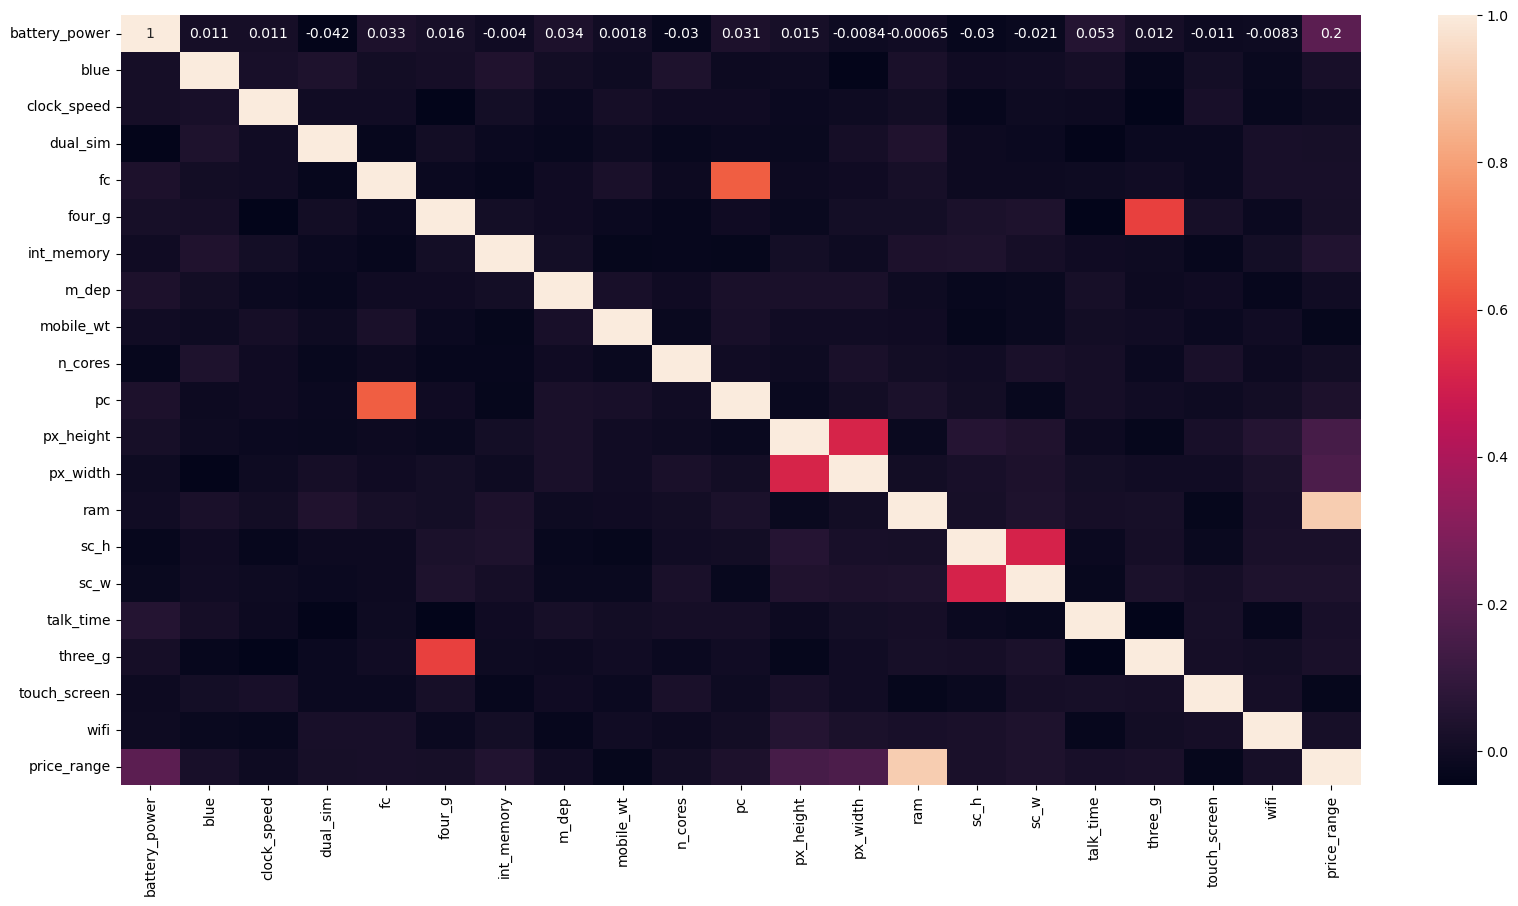

In [163]:
plt.figure(figsize =(20,10))
sns.heatmap(data_corr, annot = True)
plt.show()
#ram and price range are really correlated

### Feature Selection Conclusion

#### Checking the model performance

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score#k fold cross validation

In [165]:
rfc = RandomForestClassifier()

In [166]:
cross_val_score(rfc, x, y, cv = 10)#here rfc is estimator: object that will do
#clasffication.
#cv = 10 means ---->>> how many times you wanna training and testing
# from the  model 
# this has returned me some scores 

array([0.9  , 0.865, 0.905, 0.87 , 0.9  , 0.91 , 0.87 , 0.875, 0.855,
       0.87 ])

In [167]:
scores_using_cv = cross_val_score(rfc, x, y, cv = 10)

In [168]:
scores_using_cv
# accuracy for 10 times 

array([0.87 , 0.855, 0.895, 0.865, 0.89 , 0.895, 0.87 , 0.85 , 0.86 ,
       0.875])

In [169]:
scores_using_cv.mean() # 87.7 % is the accuracy

0.8725000000000002

### Now with limited no. of features 

In [170]:
featurescore_sorted.head(10)

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [178]:
selected_features = featurescore_sorted.head(5)["Feature"].values #only 5 features taken

In [179]:
selected_features

array(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt'],
      dtype=object)

In [180]:
data[selected_features].head(n=2)# took 5 features

,ram,px_height,battery_power,px_width,mobile_wt
0,2549,20,842,756,188
1,2631,905,1021,1988,136


In [181]:
x[selected_features].head(n =2)

,ram,px_height,battery_power,px_width,mobile_wt
0,2549,20,842,756,188
1,2631,905,1021,1988,136


In [188]:
score_with_5_fea =cross_val_score(rfc, x, y, cv = 10)# but this with 10 features

In [189]:
score_with_5_fea

array([0.88 , 0.86 , 0.905, 0.87 , 0.9  , 0.905, 0.88 , 0.85 , 0.855,
       0.885])

In [191]:
score_with_10_variable.mean()#accuracy is improved even with less feature

0.8755

### Data Preprocessing :
- Normalization / Standardization